# Final Project: Spam Detection

##### Group 29: Zihan Wang
##### put "spam.csv" in the same folder with the code then press "Run All" button to get all the results

In [63]:
#importing libraries
import pandas as pd
import numpy as np

In [64]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [65]:
#checking size of dataframe
df.shape

(5572, 5)

In [66]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Data Cleaning

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [68]:
#dropping un necessary columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [69]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [70]:
df.head(2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


Label Encoding

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [73]:
df.head(2)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [74]:
#Checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [75]:
#cheking duplicated values
df.duplicated().sum()

403

In [76]:
#dropping duplicates value
print("before removing duplicates;",df.shape)
df.drop_duplicates(keep='first',inplace=True)
print("after removing duplicates",df.shape)

before removing duplicates; (5572, 2)
after removing duplicates (5169, 2)


EDA

<Axes: xlabel='target'>

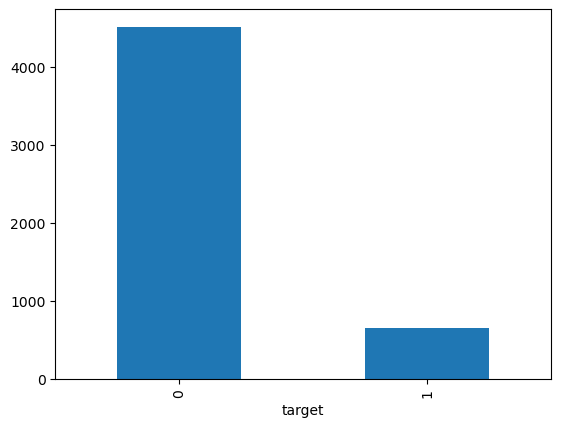

In [77]:
#Checking counts of Ham and spam
df['target'].value_counts().plot(kind='bar')

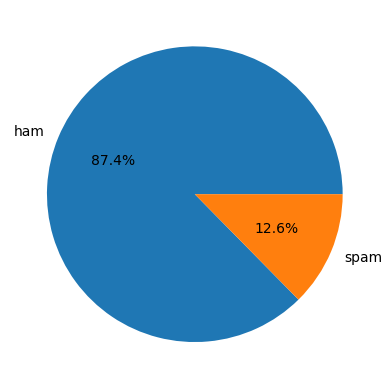

In [78]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels=['ham','spam'],autopct='%1.1f%%')
plt.show()

Feature Engineering: Adding Text-related Columns for Character, Word, and Sentence Counts

In [79]:
import nltk

In [80]:
#num of characters
df['num_characters'] = df['text'].apply(len)
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
#num of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [81]:
df.head(2)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [82]:
#overall(ham and spam)
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [83]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [84]:
# spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


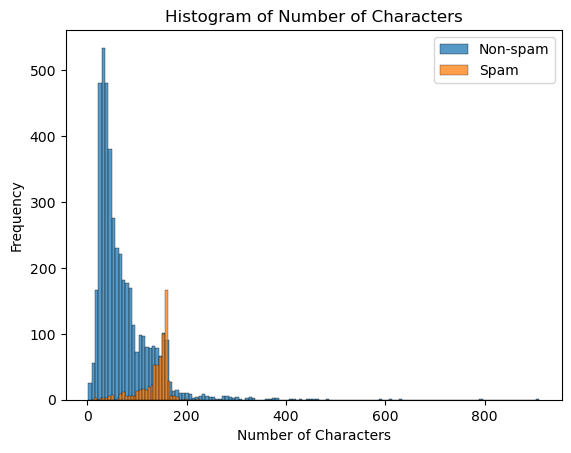

In [85]:
#num_characters
import seaborn as sns
sns.histplot(df[df['target'] == 0]['num_characters'], label='Non-spam')
sns.histplot(df[df['target'] == 1]['num_characters'], label='Spam')

plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Characters')

plt.legend()

plt.show()

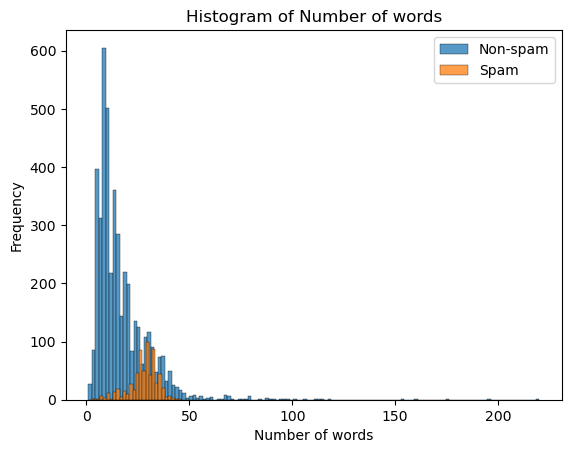

In [86]:
#num_words
sns.histplot(df[df['target'] == 0]['num_words'], label='Non-spam')
sns.histplot(df[df['target'] == 1]['num_words'], label='Spam')

plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.title('Histogram of Number of words')

plt.legend()

plt.show()

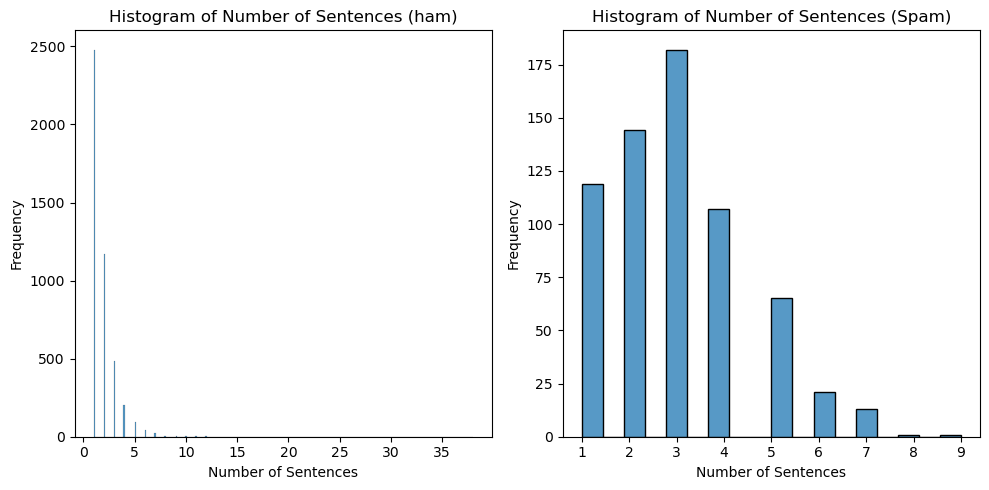

In [87]:
# for num_sentences

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot for non-spam messages
sns.histplot(df[df['target'] == 0]['num_sentences'], ax=axes[0])
axes[0].set_xlabel('Number of Sentences')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Number of Sentences (ham)')

# Plot for spam messages
sns.histplot(df[df['target'] == 1]['num_sentences'], ax=axes[1])
axes[1].set_xlabel('Number of Sentences')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Number of Sentences (Spam)')

plt.tight_layout()
plt.show()

Text Pre-processing

In [88]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Function to transform the text
def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text into individual words
    text = nltk.word_tokenize(text)
    
    # Create an empty list to store filtered words
    filtered_words = []
    
    # Iterate over each word in the text
    for word in text:
        # Check if the word contains only alphanumeric characters
        if word.isalnum():
            # Add the word to the filtered list
            filtered_words.append(word)
    
    # Update the text with the filtered words
    text = filtered_words[:]
    
    # Clear the filtered words list for reuse
    filtered_words.clear()
    
    # Remove stop words and punctuation from the text
    for word in text:
        # Check if the word is not a stop word or punctuation mark
        if word not in stopwords.words('english') and word not in string.punctuation:
            # Add the word to the filtered list
            filtered_words.append(word)
            
    # Update the text with the filtered words
    text = filtered_words[:]
    
    # Clear the filtered words list for reuse
    filtered_words.clear()
    
    # Apply stemming to the words in the text
    stemmer = PorterStemmer()
    for word in text:
        # Perform stemming on each word
        stemmed_word = stemmer.stem(word)
        # Add the stemmed word to the filtered list
        filtered_words.append(stemmed_word)
    
    # Join the filtered words to form the transformed text
    transformed_text = " ".join(filtered_words)
    
    # Return the transformed text
    return transformed_text

In [89]:
# Create a new column in the dataframe to store the transformed text
df['transformed_text'] = df['text'].apply(transform_text)

In [90]:
df.head(2)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [91]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

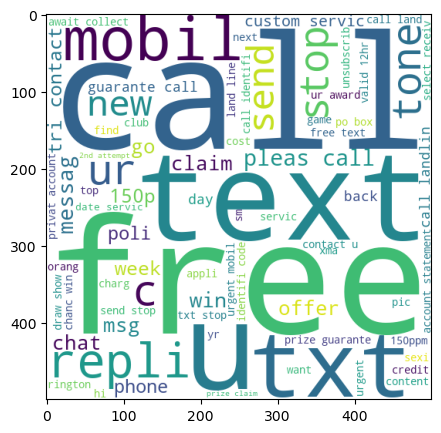

In [92]:
#generating Word cloud for only Spam words
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10,5))
plt.imshow(spam_wc)
plt.show()

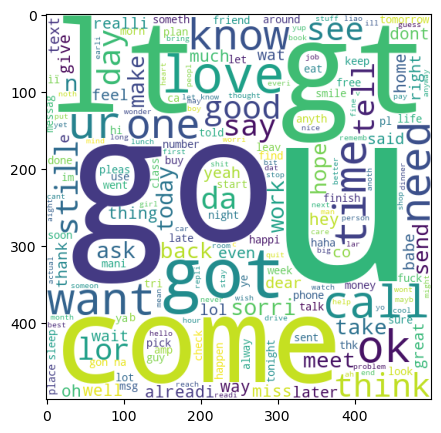

In [93]:
#generating Word cloud for only ham words

ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10,5))
plt.imshow(ham_wc)
plt.show()

Top 25 words from ham corpus

In [94]:
ham_frequncy = []  # Create an empty list to store the words from ham messages
# Iterate over each message in the transformed_text column of ham messages
for msg in df[df['target'] == 0]['transformed_text'].to_list():
    # Split the message into individual words
    for word in msg.split():
        # Append each word to the ham_frequncy list
        ham_frequncy.append(word)

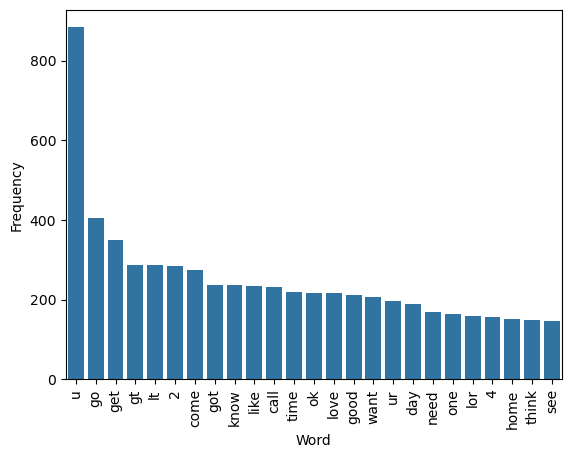

In [95]:
from collections import Counter
# Count the frequency of each word in the ham_frequncy list
word_frequency = Counter(ham_frequncy)

# Retrieve the 25 most common words along with their frequencies
most_common_words = word_frequency.most_common(25)

# Create a dataframe from the most_common_words list
df_most_common = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Plot the bar plot
sns.barplot(data=df_most_common, x='Word', y='Frequency')
plt.xticks(rotation='vertical')
plt.show()

Top 25 words from Spam corpus

In [96]:
spam_frequncy = []  # Create an empty list to store the words from ham messages
# Iterate over each message in the transformed_text column of ham messages
for msg in df[df['target'] == 1]['transformed_text'].to_list():
    # Split the message into individual words
    for word in msg.split():
        # Append each word to the ham_frequncy list
        spam_frequncy.append(word)

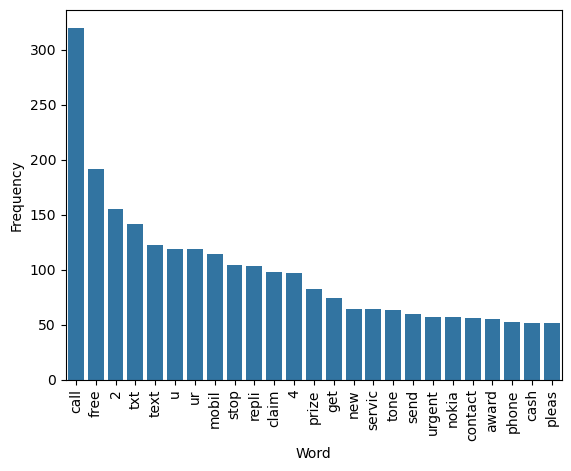

In [97]:
# Count the frequency of each word in the spam_frequncy list
word_frequency = Counter(spam_frequncy)

# Retrieve the 25 most common words along with their frequencies
most_common_words_spam = word_frequency.most_common(25)

# Create a dataframe from the most_common_words list
df_most_common_spam = pd.DataFrame(most_common_words_spam, columns=['Word', 'Frequency'])

# Plot the bar plot
sns.barplot(data=df_most_common_spam, x='Word', y='Frequency')
plt.xticks(rotation='vertical')
plt.show()

Model Building

In [98]:
#implement BOW vectorization on our text

#taking most frequent 5000 words from the vocabulary 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [99]:
# Transform the text data into a numerical representation using CountVectorizer 
#and convert it into a 2D array 
X = cv.fit_transform(df['transformed_text']).toarray()

In [100]:
X.shape

(5169, 6708)

In [101]:
# Extract the values from the 'target' column of the DataFrame and store them in variable 'y'
y = df['target'].values

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
# Splitting the data into training and testing sets
# X represents the input features and y represents the target variable
# The data is split into a training set and a testing set
# The testing set size is set to 20% of the entire dataset
# The random_state parameter is set to 2 to ensure reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Naive Bayes

In [104]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [105]:
# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()
# Create a Multinomial Naive Bayes classifier
mnb = MultinomialNB()
# Create a Bernoulli Naive Bayes classifier
bnb = BernoulliNB()

In [106]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [107]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [108]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


Tf_IDF Vectorization¶

In [ ]:
#create TF-IDF vectorizer (TfidfVectorizer) with a maximum of 3000 features.

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [110]:
# Perform TF-IDF vectorization on the 'transformed_text' column of the dataframe
X = tfidf.fit_transform(df['transformed_text']).toarray()
# Create a variable 'y' containing the values of the 'target' column
y = df['target'].values

In [111]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [112]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [113]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [114]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [115]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [116]:
# Create different classifier models
svc = SVC(kernel='sigmoid', gamma=1.0)  # Support Vector Classifier with sigmoid kernel
knc = KNeighborsClassifier()  # K-Nearest Neighbors Classifier
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)  # Decision Tree Classifier with maximum depth of 5
lrc = LogisticRegression(solver='liblinear', penalty='l1')  # Logistic Regression Classifier with L1 regularization
rfc = RandomForestClassifier(n_estimators=50, random_state=2)  # Random Forest Classifier with 50 decision trees
abc = AdaBoostClassifier(n_estimators=50, random_state=2)  # AdaBoost Classifier with 50 weak learners
bc = BaggingClassifier(n_estimators=50, random_state=2)  # Bagging Classifier with 50 base estimators
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)  # Extra Trees Classifier with 50 decision trees
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)  # Gradient Boosting Classifier with 50 boosting stages
xgb = XGBClassifier(n_estimators=50, random_state=2)  # XGBoost Classifier with 50 boosting rounds

In [117]:
#The clfs dictionary represents a collection of different machine learning algorithms that can be used for classification tasks. 
#Each algorithm is associated with a key that serves as its name.
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'DT': dtc,
    'NB': mnb, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [118]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    # Train the classifier model using the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Calculate the accuracy score by comparing the predicted labels with the true labels
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate the precision score by comparing the predicted labels with the true labels
    precision = precision_score(y_test, y_pred)
    
    # Return the accuracy and precision scores
    return accuracy, precision

In [119]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


/Users/wangzihan/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [120]:
# Create a DataFrame to store performance metrics of different algorithms
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores})

In [121]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.975822,0.974790
1,KN,0.905222,1.000000
2,DT,0.929400,0.828283
3,NB,0.970986,1.000000
4,LR,0.958414,0.970297
5,RF,0.975822,0.982906
6,AdaBoost,0.960348,0.929204
7,BgC,0.958414,0.868217
8,ETC,0.974855,0.974576
9,GBDT,0.946809,0.919192


In [122]:
# Sort the DataFrame based on the 'Precision' column in descending order
performance_df = performance_df.sort_values('Precision', ascending=False)

In [123]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
3,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
